In [3]:
import numpy as np
import pandas as pd

In [4]:
diabetes_df = pd.read_csv('diabetes.csv')

In [5]:
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_df.rename(columns = {'DiabetesPedigreeFunction':'DPF'},inplace=True)

In [7]:
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [9]:
diabetes_df.loc[diabetes_df['Glucose'] ==0,'Glucose'] = np.NaN
diabetes_df.loc[diabetes_df['BloodPressure'] == 0,'BloodPressure'] = np.NaN
diabetes_df.loc[diabetes_df['SkinThickness'] == 0,'SkinThickness'] = np.NaN
diabetes_df.loc[diabetes_df['Insulin'] == 0,'Insulin'] = np.NaN
diabetes_df.loc[diabetes_df['BMI'] == 0,'BMI'] = np.NaN
diabetes_df.loc[diabetes_df['DPF'] == 0,'DPF'] = np.NaN

In [10]:
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
diabetes_df.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

In [12]:
diabetes_df['Glucose'] = diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean())
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean())
diabetes_df['SkinThickness'].median()
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median())
diabetes_df['Insulin'] = diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median())
diabetes_df['BMI'] = diabetes_df['BMI'].fillna(diabetes_df['BMI'].mean())

In [13]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
diabetes_df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


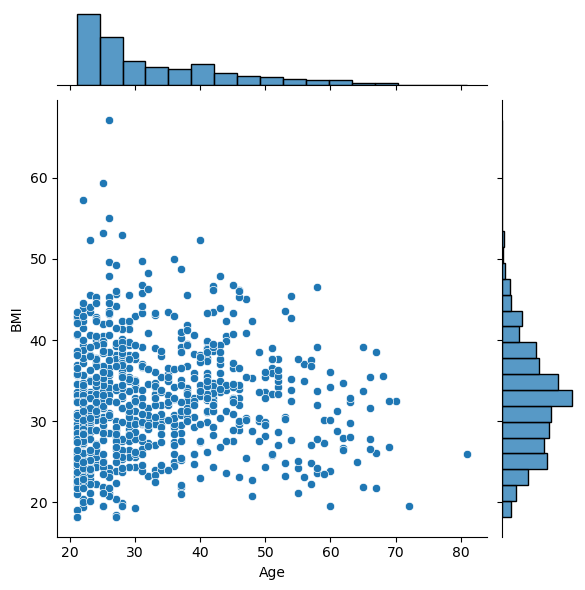

In [21]:
sns.jointplot(x='Age',y='BMI',data=diabetes_df,kind='scatter')

<Axes: xlabel='Outcome', ylabel='Age'>

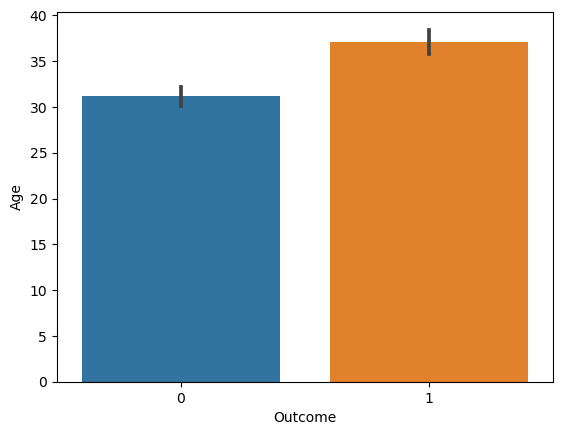

In [29]:
sns.barplot(x='Outcome',y='Age',data=diabetes_df)

<Axes: xlabel='Outcome', ylabel='count'>

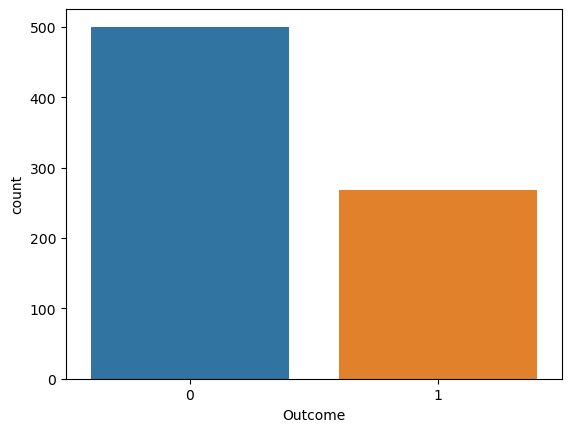

In [30]:
sns.countplot(x='Outcome',data=diabetes_df)

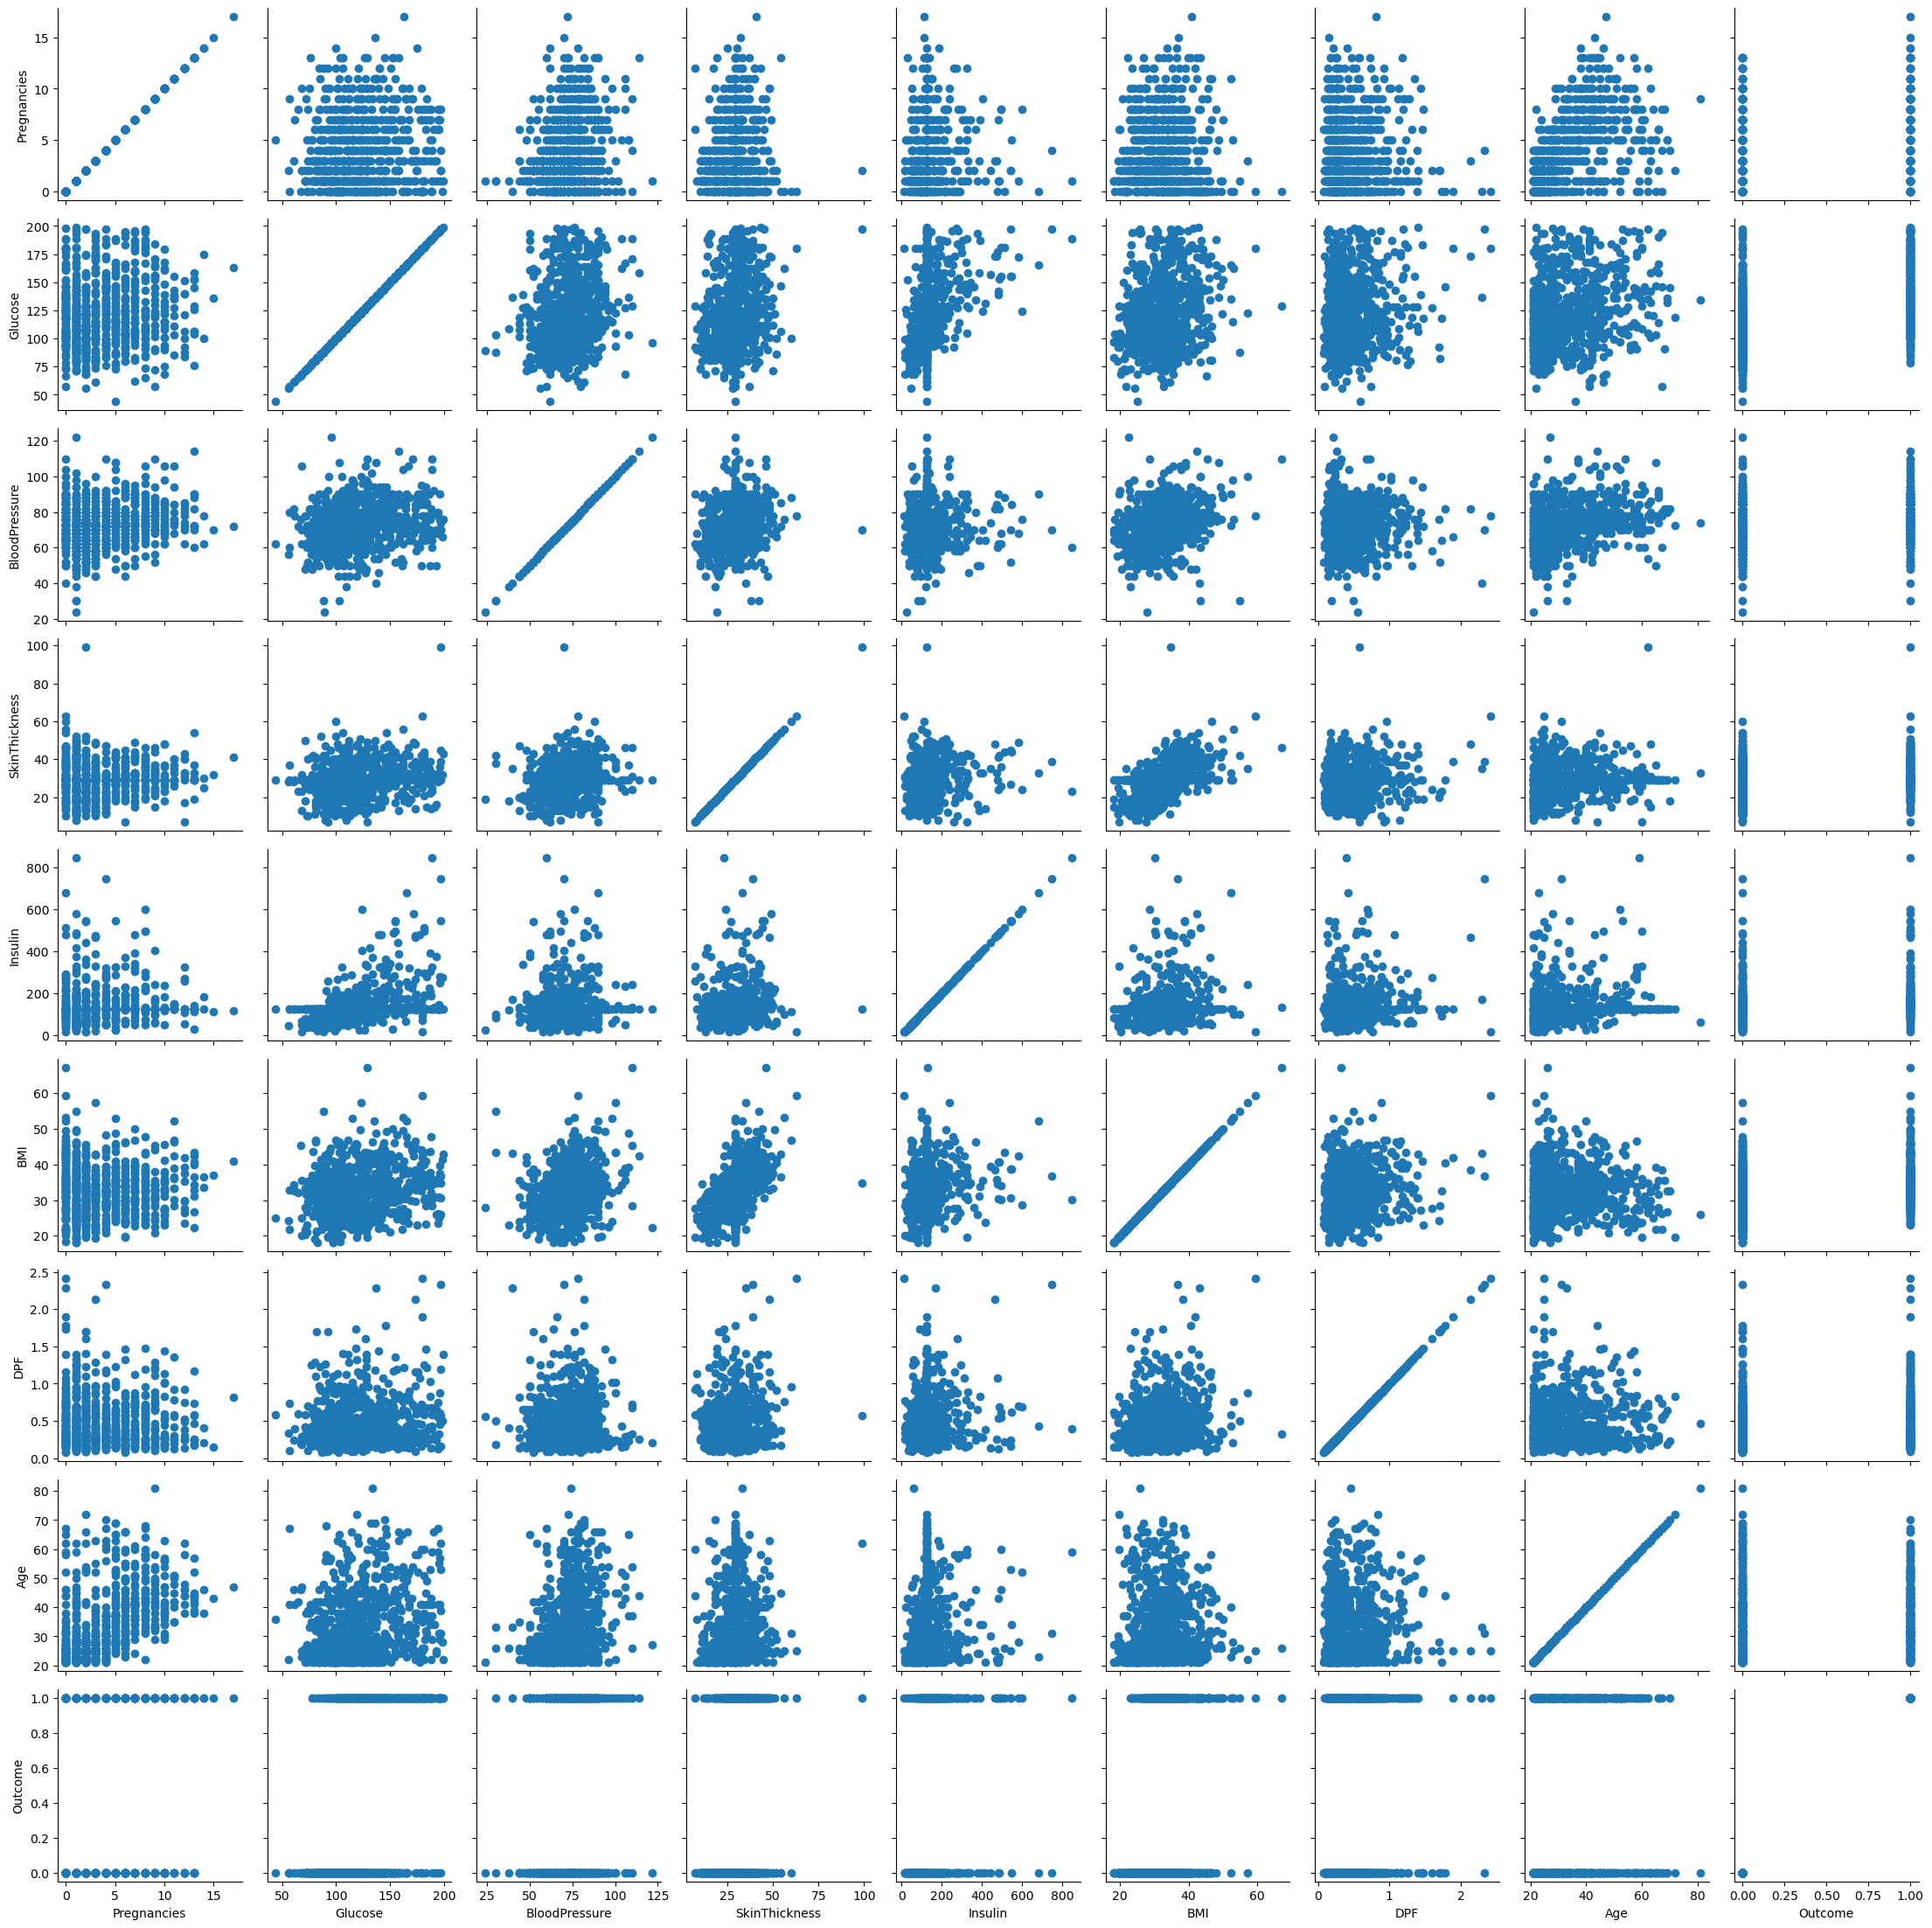

In [32]:
g=sns.PairGrid(diabetes_df)
g.map(plt.scatter)

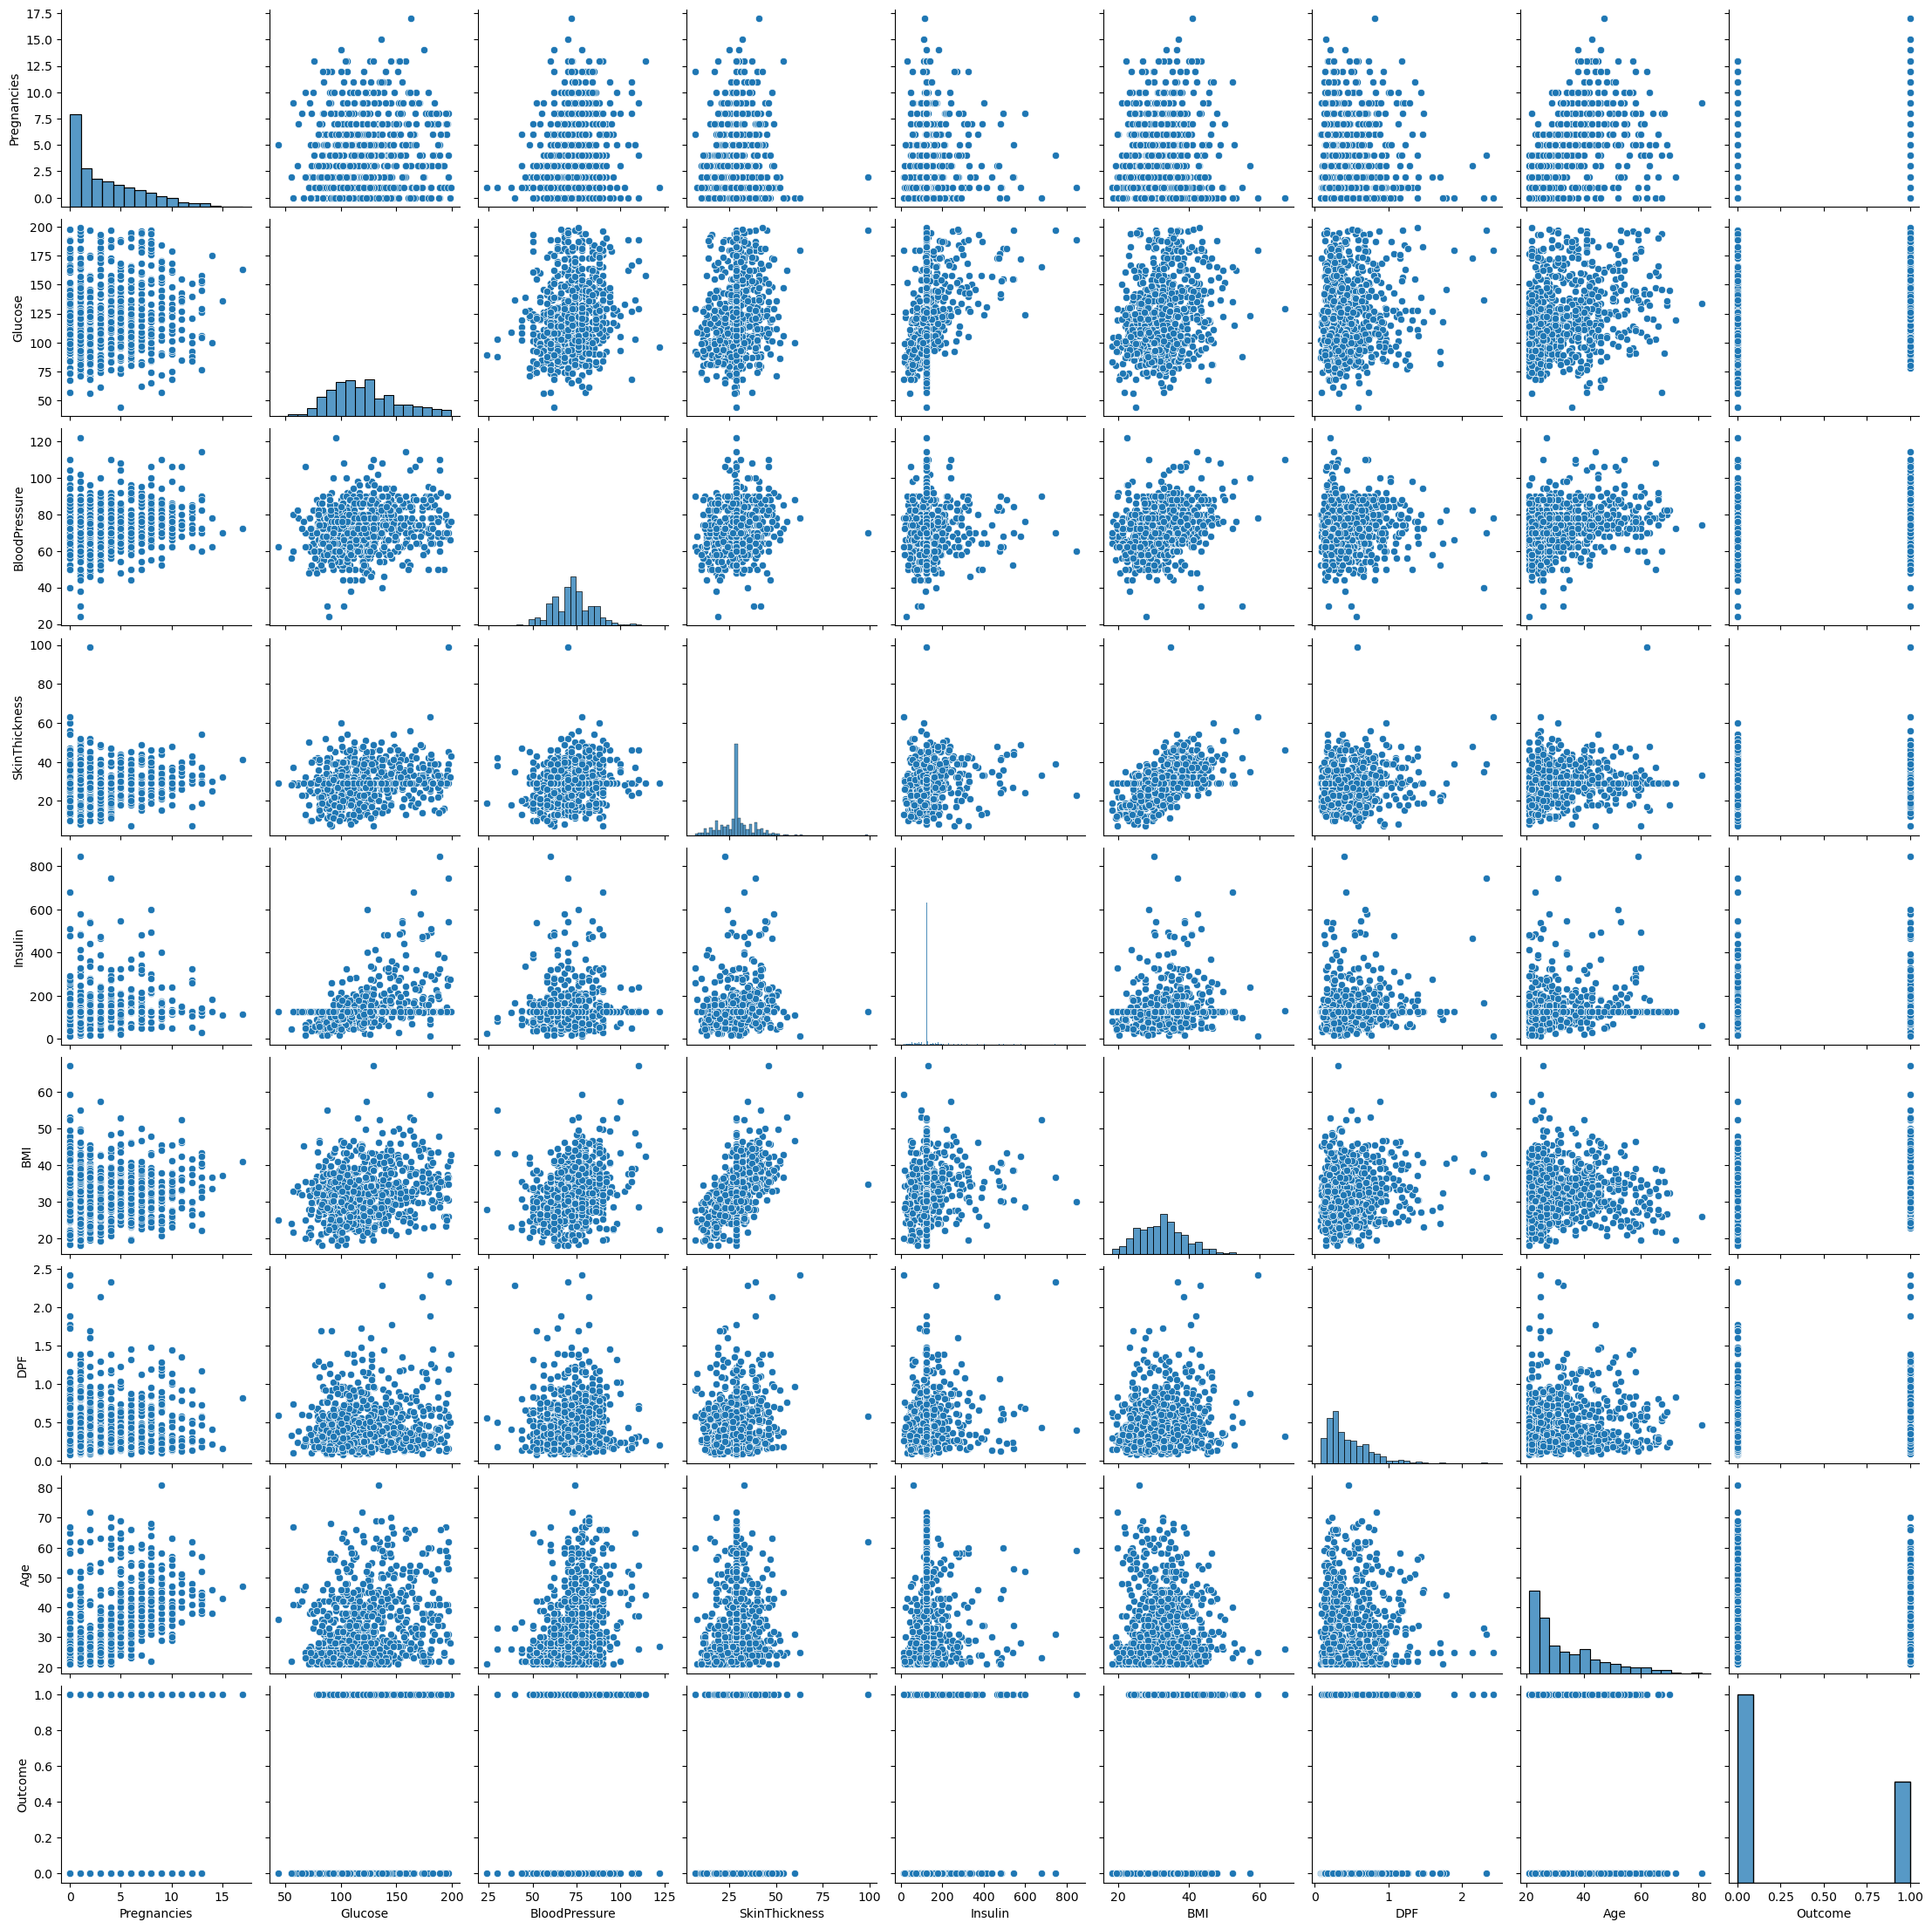

In [33]:
sns.pairplot(diabetes_df)

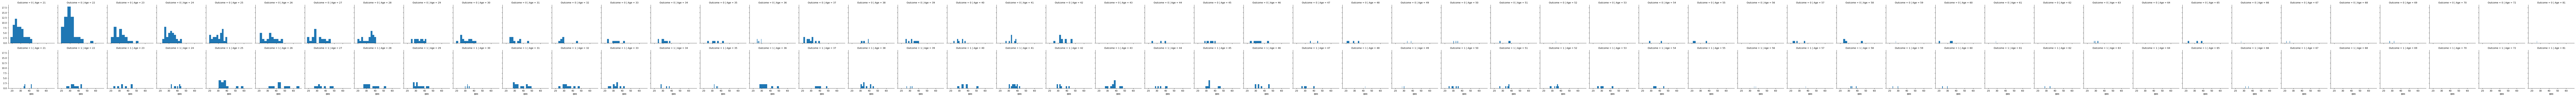

In [35]:
g = sns.FacetGrid(diabetes_df,col='Age',row='Outcome')
g.map(plt.hist,'BMI')